In [47]:
!pip install wordcloud

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as p


import re
import nltk
import string
nltk.download('punkt')
from nltk.text import Text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sazha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Import Dataset**

In [7]:
df = pd.read_csv('E:\Anitha\Data_Glacier\GitHub\VC\Week9\Twitter Dataset\Twitter Hate Speech.csv')
df.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


**Data Information**

In [8]:
print(f'Number of Observations: {df.shape[0]}')
print(f'Number of Features: {df.shape[1]}')

Number of Observations: 31962
Number of Features: 3


In [9]:
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [10]:
df.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [12]:
df.size

95886

**Check the missing value**

In [15]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

**Extracting the Target Attribute for Each Class and Visualize**

In [16]:
# Extract the Label Feature for Each Class
hate_speech = df[df['label'] == 1].shape[0]
free_speech = df[df['label'] == 0].shape[0]
print('Hate Speech =', hate_speech)
print('Free Speech =', free_speech)

Hate Speech = 2242
Free Speech = 29720


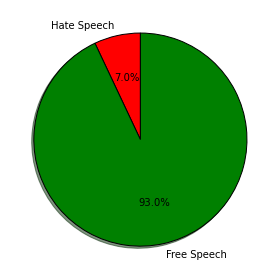

In [17]:
# Visualize the Label Class
speech = [hate_speech, free_speech]
label = ["Hate Speech", "Free Speech"]

plt.pie(speech, labels = label, shadow = True, wedgeprops = {'edgecolor': 'black'}, 
        autopct = '%1.1f%%', startangle= 90, colors=['red', 'green'])

plt.tight_layout()
plt.show()

**Data Preprocessing**

**Lower Case**

In [18]:
def lower_case(text):
    return text.lower()

df['tweet'] = df['tweet'].apply(lower_case)

**Remove Punctuation**

In [19]:
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation))

df['tweet'] = df['tweet'].apply(remove_punct)

**Remove URLs**

In [20]:
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation))

df['tweet'] = df['tweet'].apply(remove_punct)

**Removing tags**

In [22]:
def remove_tag(text):
    newtext= re.sub(r'(@[A-Za-z0-9]+)',"",text)
    return newtext

df['tweet'] = df['tweet'].apply(remove_tag)

**Preprocessing Opeartions**

**Word Cloud**

In [70]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [71]:
def tokenize(text):
    text = word_tokenize(text)
    return text

df['tweet'] = df['tweet'].apply(tokenize)


In [48]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS



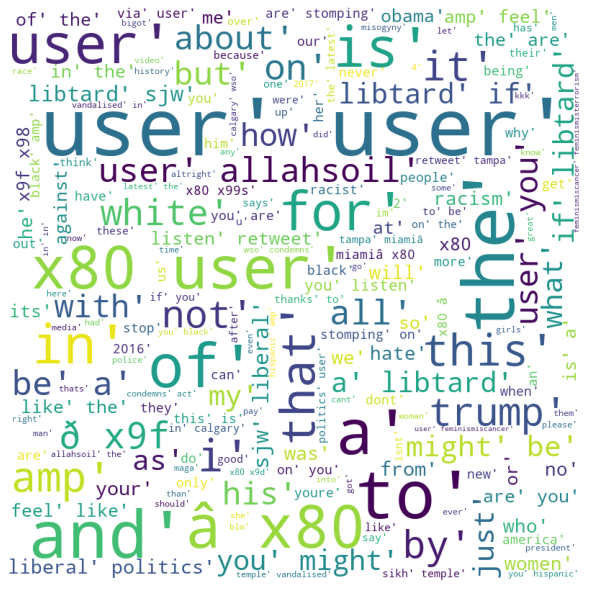

In [54]:
# WordCloud of Hate speech
hate_speech = df[df['label'] == 1]   
comment_words = ''
stopwords = set(STOPWORDS)
for val in hate_speech.tweet:
     
    
    val = str(val)
 
    tokens = val.split()
     

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
                     
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

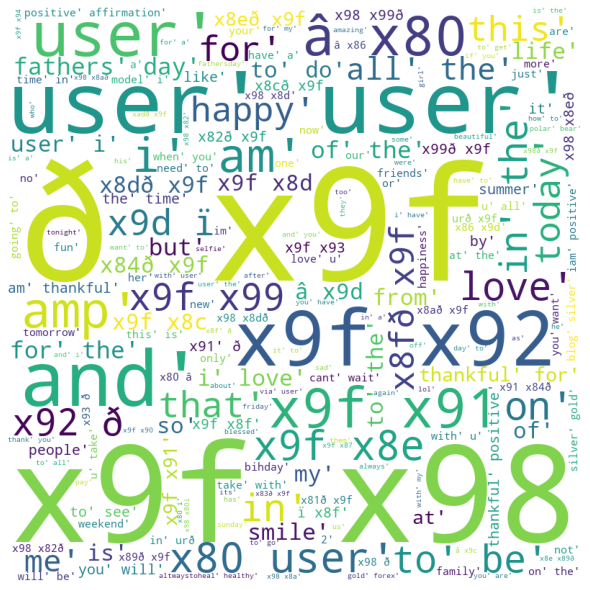

In [55]:
# WordCloud of free speech
free_speech = df[df['label'] == 0]   
comment_words = ''
stopwords = set(STOPWORDS)
for val in free_speech.tweet:
     
    #typecaste each val to string
    val = str(val)
 
    #split the value
    tokens = val.split()
     
    #Converts each token into lowercase
    for i in range(len(tokens)):
         tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

**Feature Extraction**

**TF-IDF model**

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [60]:
vectorizer = TfidfVectorizer(max_features= 2000)

In [61]:
list_to_str = []
for lists in df['tweet']:
    list_to_str.append(' '.join(map(str, lists)))

df['tweet'] = list_to_str

In [62]:
corpus = df['tweet']
text = vectorizer.fit_transform(corpus).toarray()

In [63]:
text.shape

(31962, 2000)

**Split the Dataset**

In [64]:
from sklearn.model_selection import train_test_split

**Split the dataset into train and test**

In [65]:
label = df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(text, label, test_size=0.2, random_state=0)

**Training Data**

In [67]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (25569, 2000)
y_train (25569,)


**Testing Data**

In [69]:
print("X_test", X_test.shape)
print("y_test", y_test.shape)


X_test (6393, 2000)
y_test (6393,)
